In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd# data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gold-price-data/gld_price_data.csv


In [2]:
df = pd.read_csv('/kaggle/input/gold-price-data/gld_price_data.csv')

df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


No null values

In [4]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Diffrence between min and max in USO column is huge we will check it in data cleaning phase 

In [5]:
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
df.duplicated().sum()

0

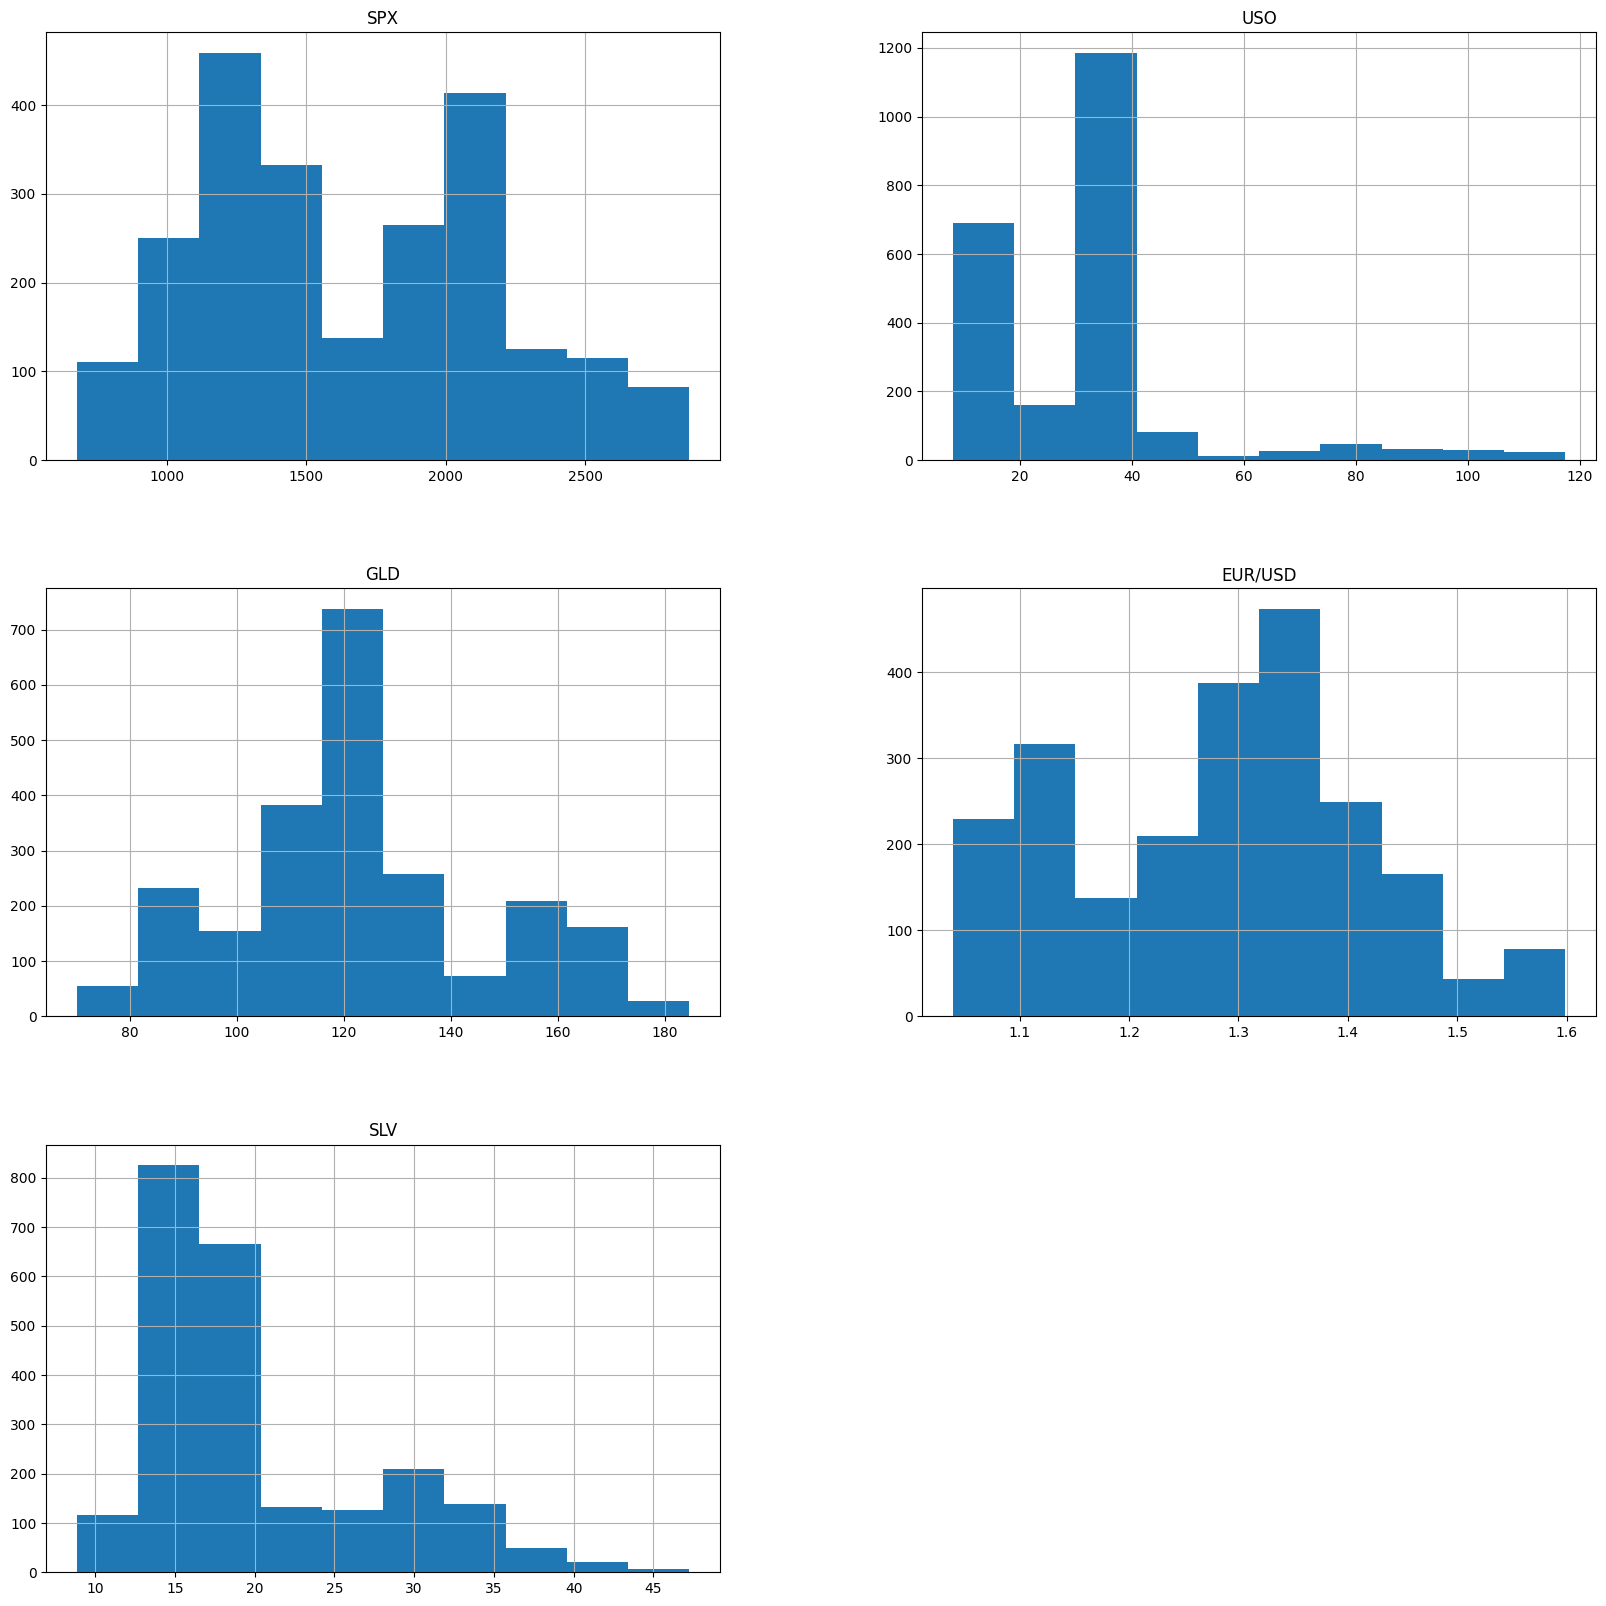

In [7]:
df[['SPX',"USO","GLD",'EUR/USD','SLV']].hist(figsize = (20,20));

**Looks like all are normally distributed except USO as it seems to have some outliers and maybe SLV also has outliers**

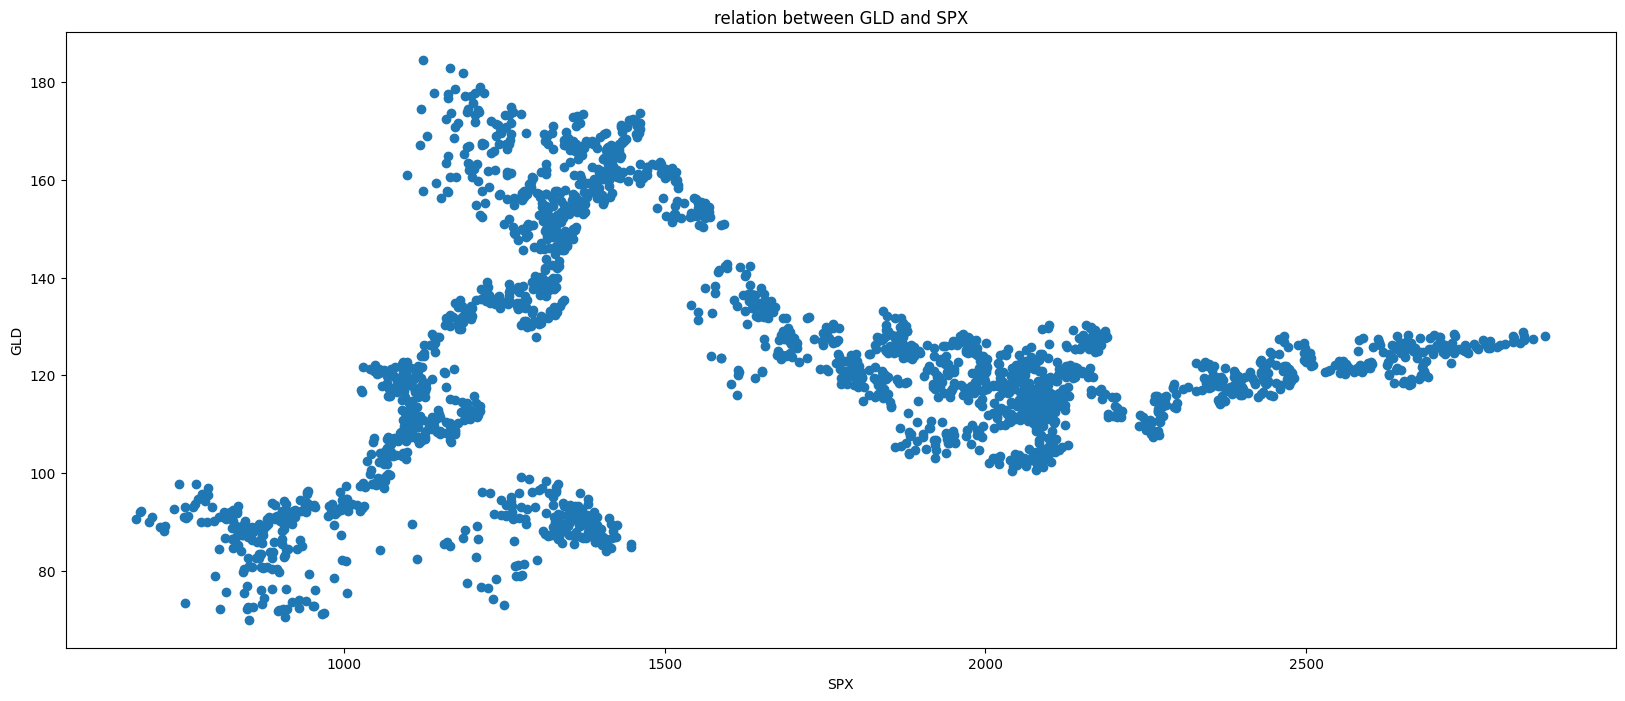

In [8]:
fig = plt.figure(figsize =(20,8))

plt.scatter(df['SPX'],df['GLD'])

plt.xlabel('SPX')
plt.ylabel('GLD')
plt.title("relation between GLD and SPX")
plt.show()

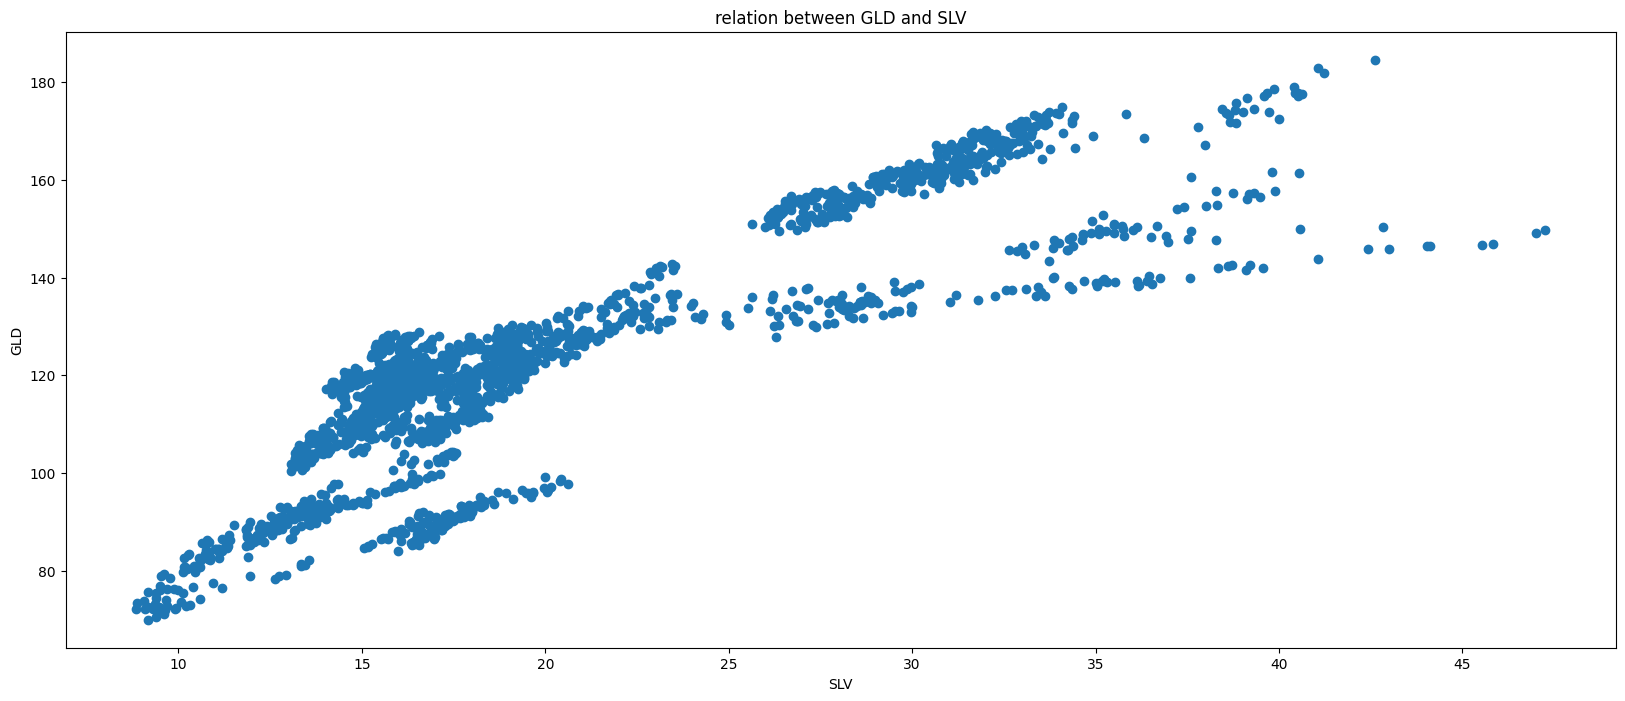

In [9]:
fig = plt.figure(figsize =(20,8))

plt.scatter(df['SLV'],df['GLD'])

plt.xlabel('SLV')
plt.ylabel('GLD')
plt.title("relation between GLD and SLV")
plt.show()

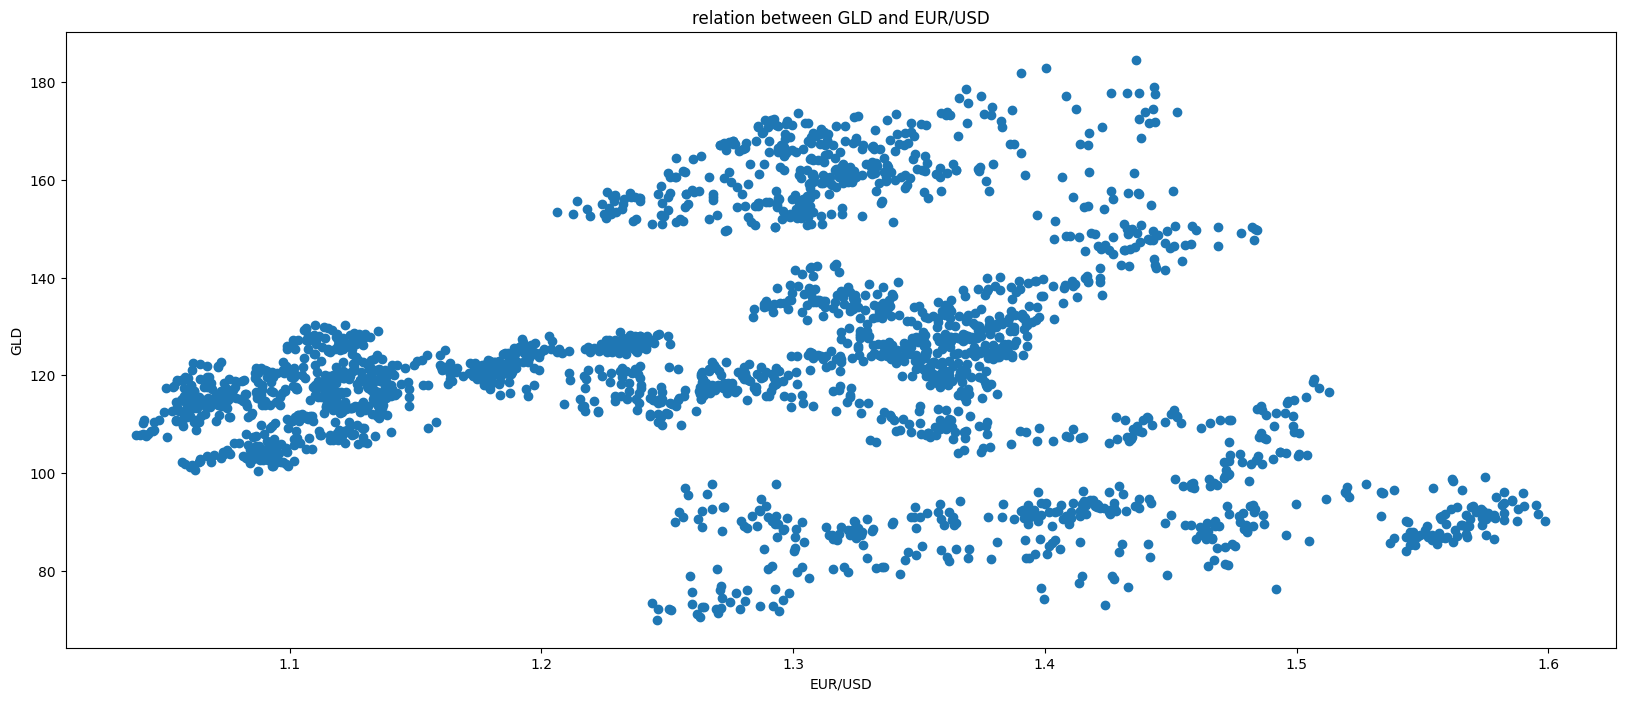

In [10]:
fig = plt.figure(figsize =(20,8))

plt.scatter(df['EUR/USD'],df['GLD'])

plt.xlabel('EUR/USD')
plt.ylabel('GLD')
plt.title("relation between GLD and EUR/USD")
plt.show()

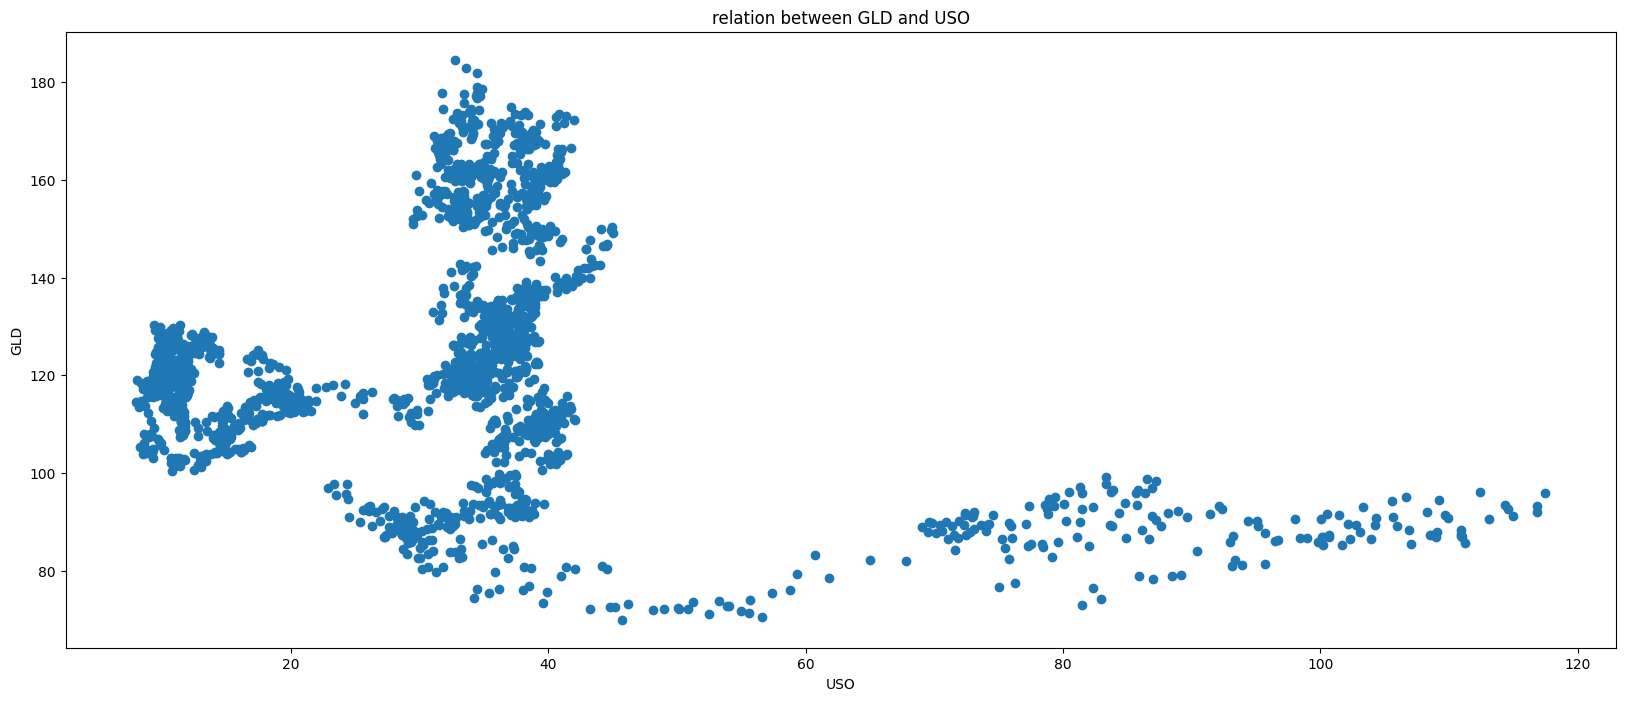

In [11]:
fig = plt.figure(figsize =(20,8))

plt.scatter(df['USO'],df['GLD'])

plt.xlabel('USO')
plt.ylabel('GLD')
plt.title("relation between GLD and USO")
plt.show()

**It seems that SLV is linearly progressive with GLD**

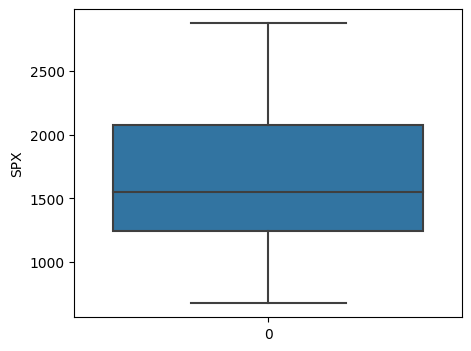

In [12]:
plt.figure(figsize =(5,4))

sns.boxplot(df['SPX'])
plt.ylabel('SPX')
plt.show()

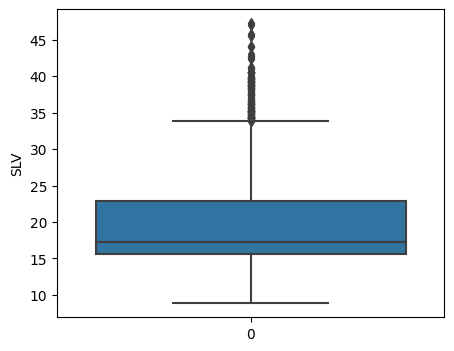

In [13]:
fig = plt.figure(figsize =(5,4))
sns.boxplot(df['SLV'])
plt.ylabel('SLV')
plt.show()

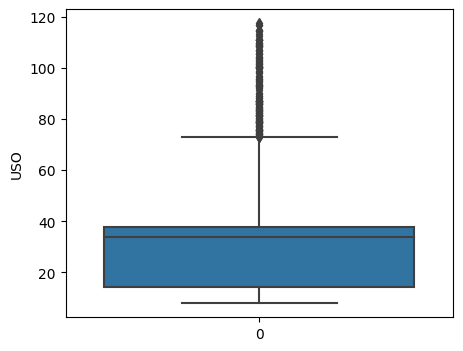

In [14]:
fig = plt.figure(figsize =(5,4))
sns.boxplot(df['USO'])
plt.ylabel('USO')
plt.show()

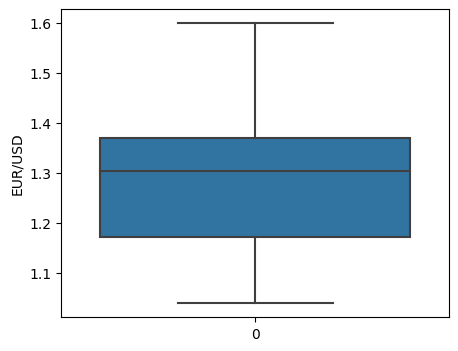

In [15]:
plt.figure(figsize =(5,4))
sns.boxplot(df['EUR/USD'])
plt.ylabel('EUR/USD')
plt.show()

**Looks like SLV and USO has some outliers**

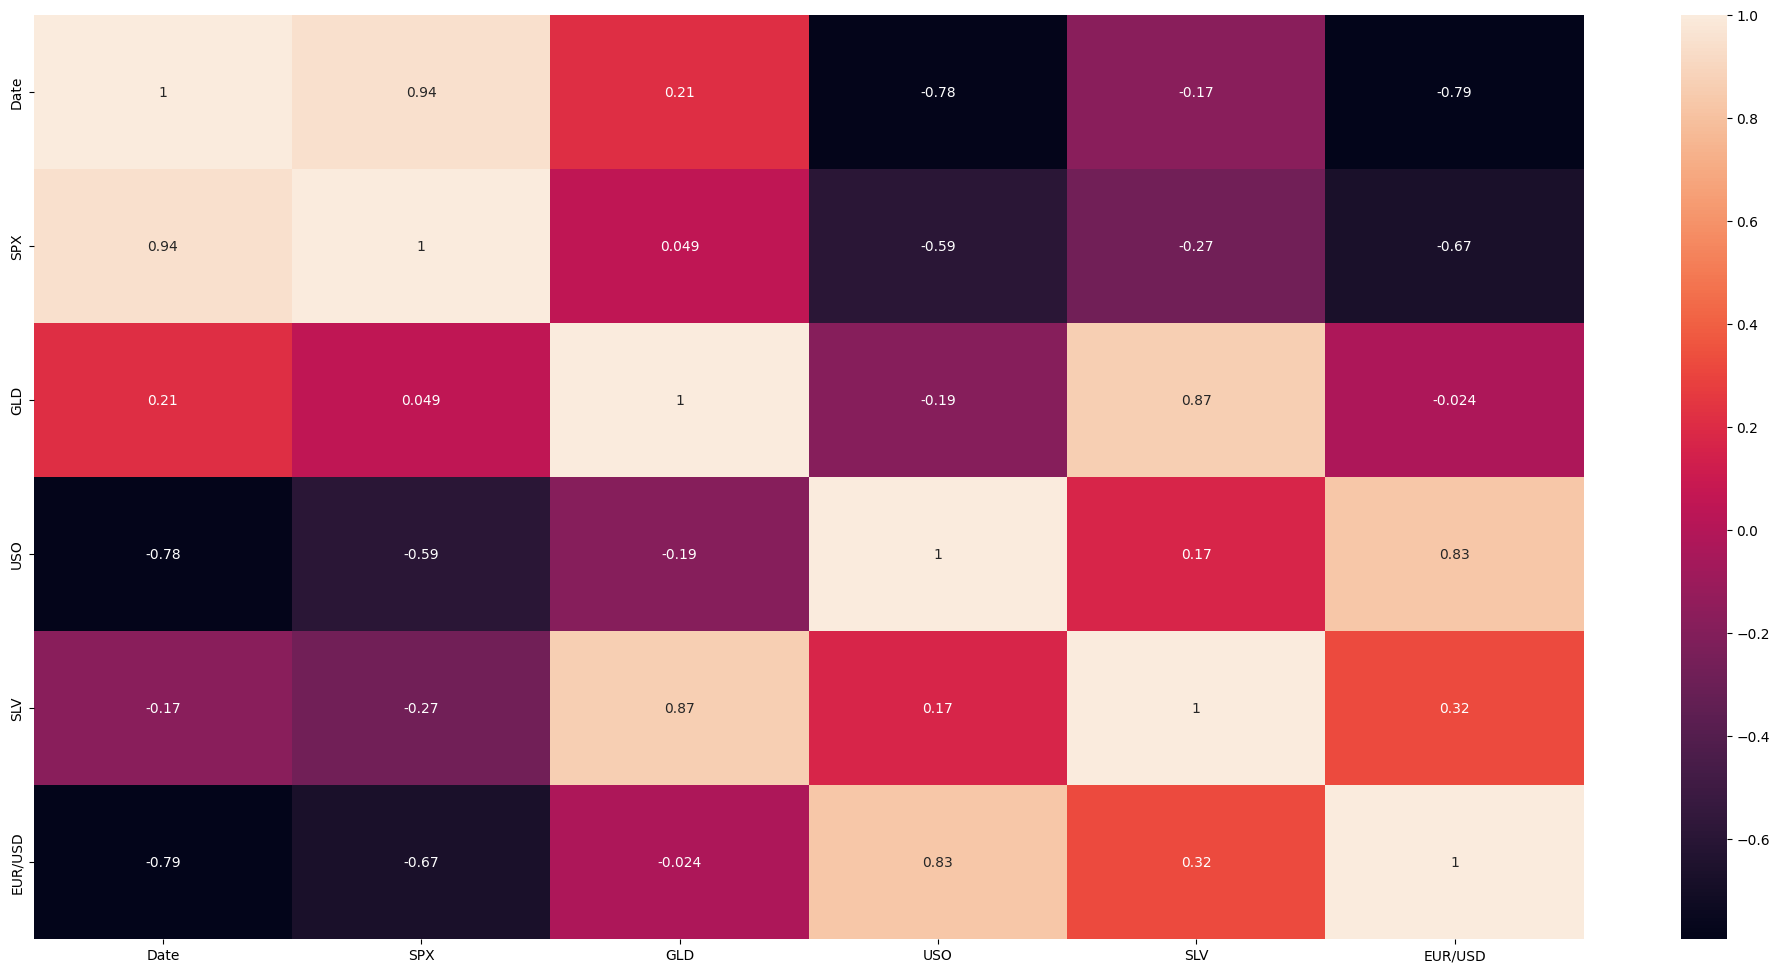

In [16]:
fig = plt.figure(figsize = (25,12))

sns.heatmap(df.corr(),annot = True)
plt.show()

In [17]:
df.corr()['GLD'].sort_values(ascending = False)

GLD        1.000000
SLV        0.866632
Date       0.209118
SPX        0.049345
EUR/USD   -0.024375
USO       -0.186360
Name: GLD, dtype: float64

**There is a postive correlation between GLD and SLV (silver), However there is negative between GLD and USO**

In [18]:
df2 = df.copy()

df2

,Date,SPX,GLD,USO,SLV,EUR/USD
0,2008-01-02,1447.160034,84.860001,78.470001,15.1800,1.471692
1,2008-01-03,1447.160034,85.570000,78.370003,15.2850,1.474491
2,2008-01-04,1411.630005,85.129997,77.309998,15.1670,1.475492
3,2008-01-07,1416.180054,84.769997,75.500000,15.0530,1.468299
4,2008-01-08,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,2018-05-08,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,2018-05-09,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,2018-05-10,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,2018-05-14,2730.129883,124.489998,14.380000,15.5600,1.193118


In [19]:
df2.drop(['Date'],axis=1,inplace = True)

df2

,SPX,GLD,USO,SLV,EUR/USD
0,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...
2285,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,2730.129883,124.489998,14.380000,15.5600,1.193118


In [20]:

x = df2.drop(['GLD'],axis=1)
y = df2['GLD']

print(x,y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns] 0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size = 0.2)

In [22]:
X_train

,SPX,USO,SLV,EUR/USD
2111,2470.300049,10.280000,15.90,1.182410
2193,2675.810059,11.460000,15.15,1.177496
1443,1987.979980,37.820000,19.58,1.346475
167,968.750000,55.590000,9.58,1.270196
2222,2822.429932,12.900000,16.15,1.238114
...,...,...,...,...
1861,2112.129883,12.220000,15.60,1.135783
369,1050.780029,33.970001,15.99,1.468493
1509,2039.819946,28.830000,15.63,1.247598
1170,1578.790039,32.660000,22.42,1.301744


In [23]:
Y_train

2111    120.750000
2193    119.180000
1443    124.349998
167      71.339996
2222    126.800003
           ...    
1861    118.820000
369      97.550003
1509    114.470001
1170    138.369995
1801    117.110001
Name: GLD, Length: 1832, dtype: float64

In [24]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
lreg.fit(X_train, Y_train)
print('Train score', lreg.score(X_train, Y_train))
print('Test score', lreg.score(X_test, Y_test))

Train score 0.8822228183148855
Test score 0.8779471601625581


In [25]:
y_pred = lreg.predict(X_test)

In [26]:
mean_squared_error(y_pred,Y_test)

66.10436229748635

In [27]:
from xgboost import XGBRegressor
model_xgbre = XGBRegressor(learning_rate = 0.5 , max_depth = 5, n_estimator = 50)

In [28]:
model_xgbre.fit(X_train,Y_train)

model_xgbre.score(X_test,Y_test)

/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [04:50:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


0.9854893948156775

In [29]:
y_pred_Xgb = model_xgbre.predict(X_test)

In [30]:
mean_squared_error(y_pred_Xgb,Y_test)

7.859008471558541

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(10, activation='relu', input_dim=4))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

2024-02-06 04:50:49.482081: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-06 04:50:49.482223: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-06 04:50:49.659723: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                50        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 171 (684.00 Byte)
Trainable params: 171 (684.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
history = model.fit(X_train, Y_train, epochs=200, validation_split=0.2)

Epoch 1/200
46/46 [==============================] - 1s 7ms/step - loss: 40966.1289 - val_loss: 13019.6201
Epoch 2/200
46/46 [==============================] - 0s 3ms/step - loss: 6548.2437 - val_loss: 2808.6455
Epoch 3/200
46/46 [==============================] - 0s 3ms/step - loss: 2221.0693 - val_loss: 1718.0585
Epoch 4/200
46/46 [==============================] - 0s 3ms/step - loss: 1839.3995 - val_loss: 1658.0061
Epoch 5/200
46/46 [==============================] - 0s 3ms/step - loss: 1816.5270 - val_loss: 1649.1710
Epoch 6/200
46/46 [==============================] - 0s 3ms/step - loss: 1809.5631 - val_loss: 1641.1337
Epoch 7/200
46/46 [==============================] - 0s 3ms/step - loss: 1801.3955 - val_loss: 1632.4534
Epoch 8/200
46/46 [==============================] - 0s 3ms/step - loss: 1789.9177 - val_loss: 1623.0785
Epoch 9/200
46/46 [==============================] - 0s 3ms/step - loss: 1778.5483 - val_loss: 1613.0863
Epoch 10/200
46/46 [==============================] -

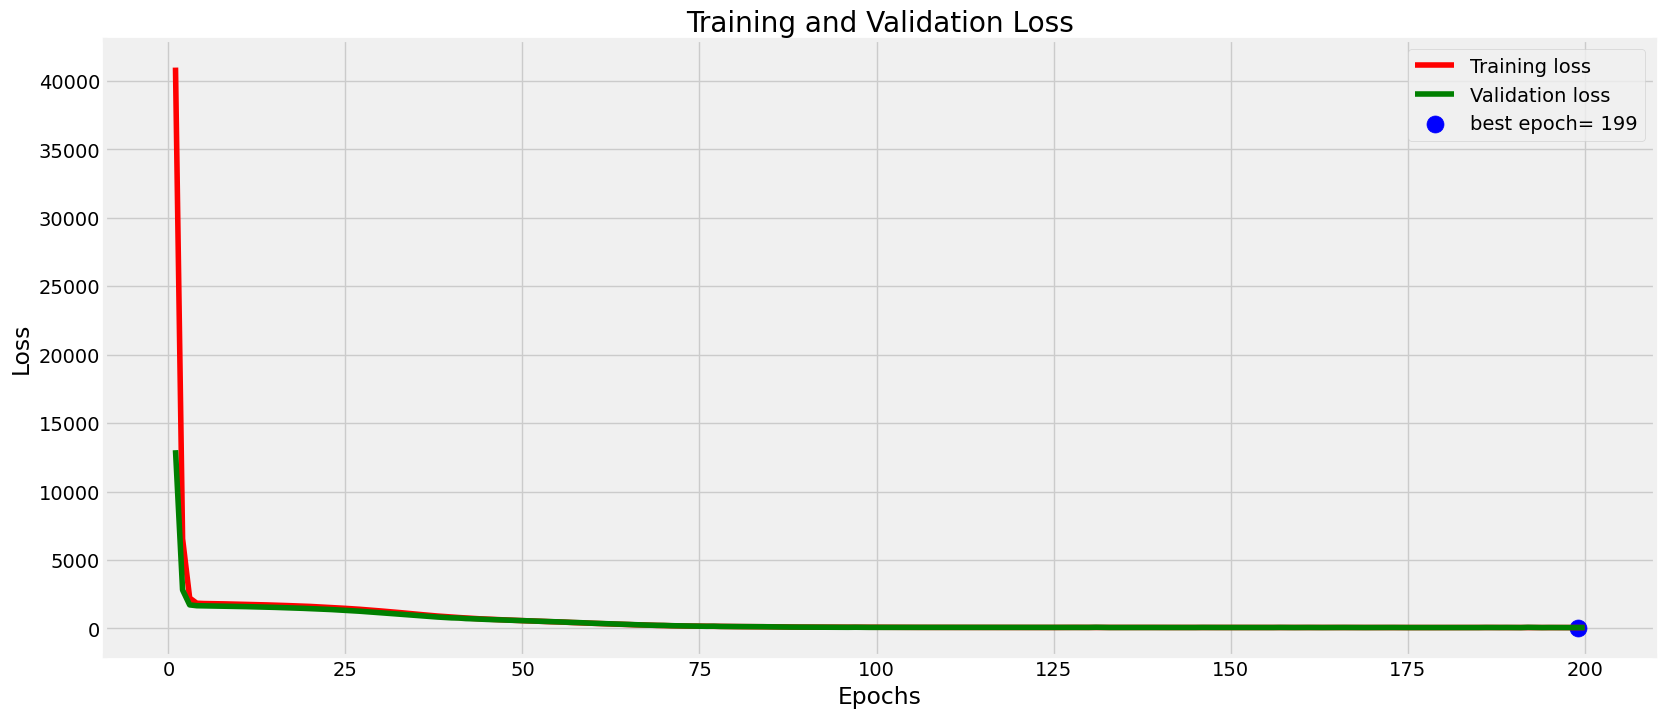

In [33]:
tr_loss = history.history['loss']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]

Epochs = [i+1 for i in range(len(tr_loss))]
loss_label = f'best epoch= {str(index_loss + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout
plt.show()

In [34]:
ann_y_pred = model.predict(X_test)

15/15 [==============================] - 0s 1ms/step


In [35]:
from sklearn.metrics import r2_score

R2 = r2_score(Y_test, ann_y_pred)
print("R2 Score=",R2 )

R2 Score= 0.87921335058495


In [36]:
model.evaluate(X_test, Y_test)

15/15 [==============================] - 0s 2ms/step - loss: 65.4186


65.4185791015625

In [37]:
MAPE = mean_absolute_percentage_error(Y_test, ann_y_pred)
Accuracy = 1 - MAPE
print("Test MAPE:", MAPE)
print("Test Accuracy:", Accuracy)

Test MAPE: 0.050626441611837804
Test Accuracy: 0.9493735583881622


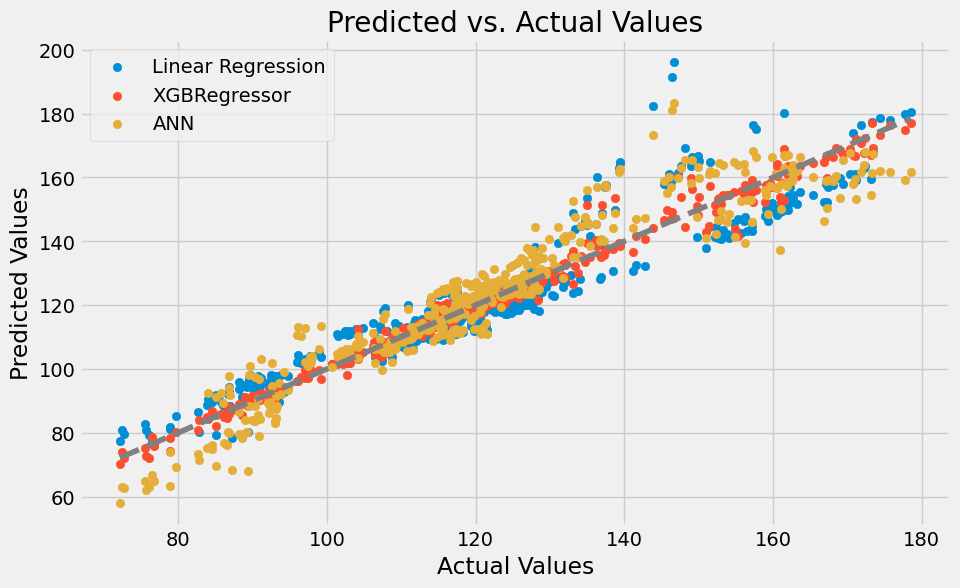

In [38]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, y_pred, label='Linear Regression')
plt.scatter(Y_test, y_pred_Xgb, label='XGBRegressor')
plt.scatter(Y_test, ann_y_pred, label='ANN')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], linestyle='--', color='gray')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values')
plt.legend()
plt.show()

**So the best model was XGBRegressor**